In [1]:
using AA222
using PyPlot
using Optim

INFO: Loading help data...


# Cyclic Coordinate Algorithm

In [2]:
function basis(i, n)
    ei = zeros(n)
    ei[i] = 1
    ei
end

function cyclicCoordinateHistory(f, x; iterations = 10)
    n = length(x)
    history = x
    for i = 1:iterations
        for j = 1:n
            result = optimize(alpha -> f(x + alpha * basis(j, n)), -100, 100)
            alpha = result.minimum
            x = x + alpha .* basis(j, n)
            history = [history x]
        end
    end
    return history
end

cyclicCoordinateHistory (generic function with 1 method)

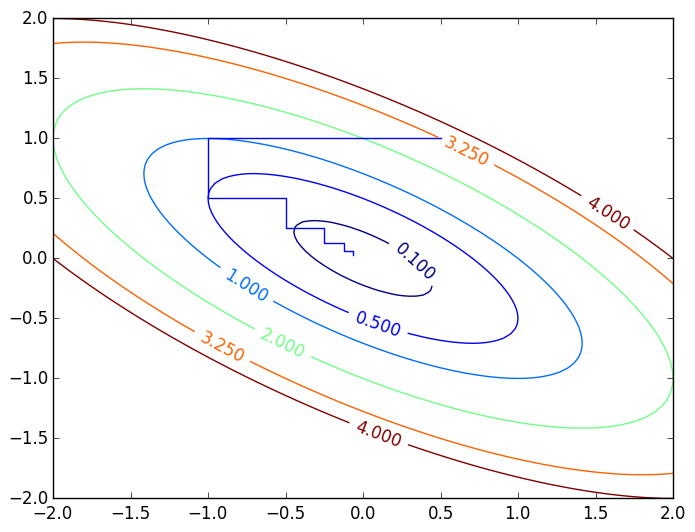

In [3]:
f(x) = x[1]^2 + 2x[2]^2 + 2x[1]x[2]
history = cyclicCoordinateHistory(f, [0.5,1.], iterations = 5)
xdom(-2,2)
ydom(-2,2)
contour(f, [0.1, 0.5, 1, 2, 3.25, 4])
plot(history);

In [4]:
function cyclicCoordinateAccelerationHistory(f, x; iterations = 10)
    n = length(x)
    history = x
    for i = 1:iterations
        xtmp = x
        for j = 1:n
            result = optimize(alpha -> f(x + alpha * basis(j, n)), -100, 100)
            alpha = result.minimum
            x = x + alpha .* basis(j, n)
            history = [history x]
        end
        # acceleration step
        d = x - xtmp
        result = optimize(alpha -> f(x + alpha .* d), -100, 100)
        alpha = result.minimum
        x = x + alpha .* d
        history = [history x]        
    end
    return history
end

cyclicCoordinateAccelerationHistory (generic function with 1 method)

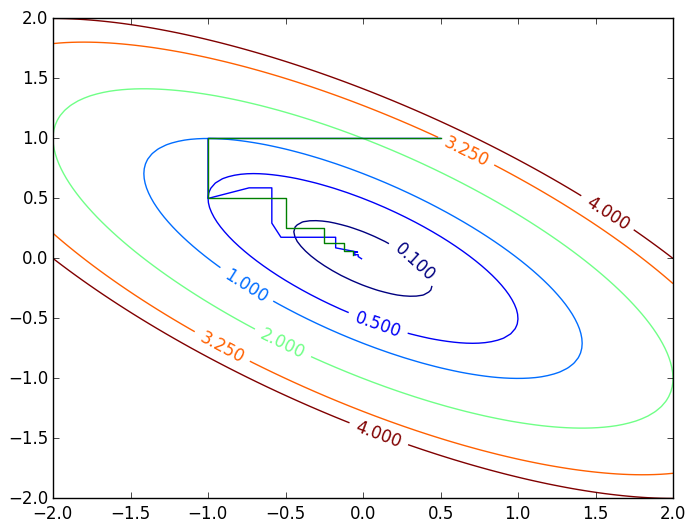

In [5]:
accelerationHistory = cyclicCoordinateAccelerationHistory(f, [0.5,1.], iterations = 5)
contour(f, [0.1, 0.5, 1, 2, 3.25, 4])
plot(accelerationHistory)
plot(history);

# Transformations to remove some bounds and constraints

The bound $l_i \leq x_i \leq u_i$ can be treated as a new unconstrained variable  
$$x_i = \frac{u_i + l_i}{2} + \frac{u_i - l_i}{2} \left(\frac{2y_i}{1+y_i^2}\right)$$

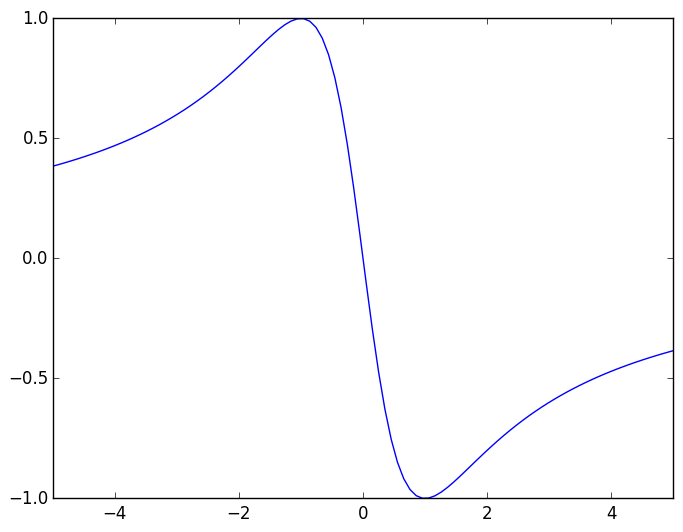

In [6]:
g(y, u, l) = (u+l)/2 + ((u-l))/2*(2*y/(1+y^2))
xdom(-5,5)
plot(y->g(y,-1,1));

Optimize $\sin(x)x$ with $x \in (2,6)$

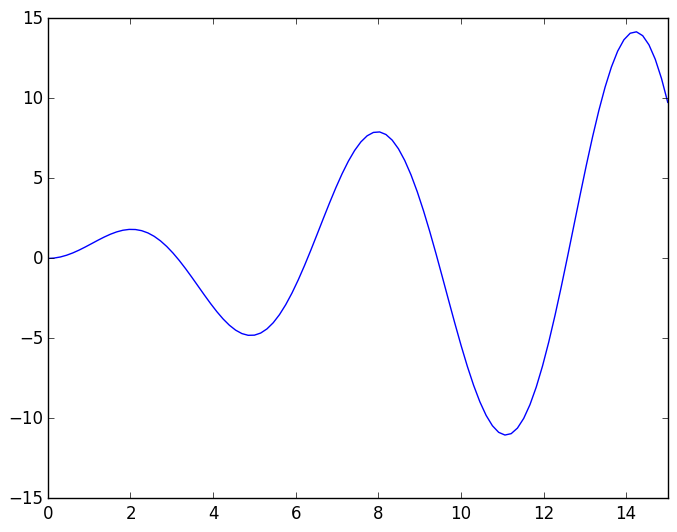

In [7]:
xdom(0,15)
f(x) = sin(x)*x
plot(f);

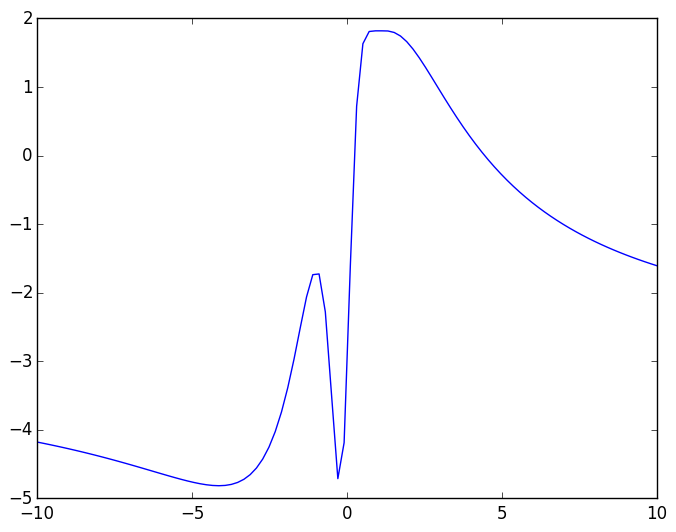

4.9411764705882355

In [8]:
xdom(-10,10)
plot(y->f(g(y,2,6)))
g(-4,2,6)